<a href="https://colab.research.google.com/github/Girii-397/COLAB_DATA-ANALYST/blob/main/AB_Testing%5B28_11_2024%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/faviovaz/marketing-ab-testing")

Skipping, found downloaded files in "./marketing-ab-testing" (use force=True to force download)


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv('/content/marketing-ab-testing/marketing_AB.csv')

In [ ]:
data


,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14
...,...,...,...,...,...,...,...
588096,588096,1278437,ad,False,1,Tuesday,23
588097,588097,1327975,ad,False,1,Tuesday,23
588098,588098,1038442,ad,False,3,Tuesday,23
588099,588099,1496395,ad,False,1,Tuesday,23


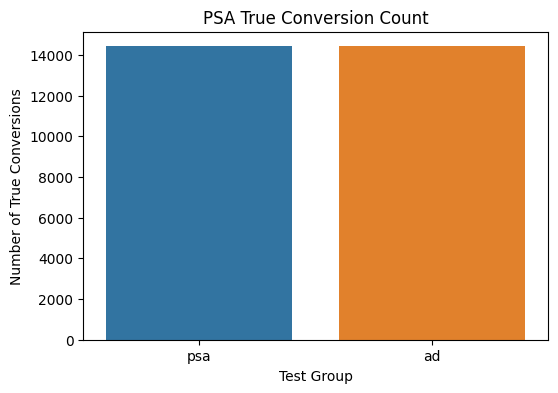

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'data' is your DataFrame
psa_true_count = data[(data['test group'] == 'psa') & (data['converted'] == True)]['converted'].sum()
psa_true_count = data[(data['test group'] == 'ad') & (data['converted'] == True)]['converted'].sum()
# Create a bar chart
plt.figure(figsize=(6, 4))
sns.barplot(x=['psa'], y=[psa_true_count])
sns.barplot(x=['ad'], y=[psa_true_count])
plt.xlabel("Test Group")
plt.ylabel("Number of True Conversions")
plt.title("PSA True Conversion Count")
plt.show()

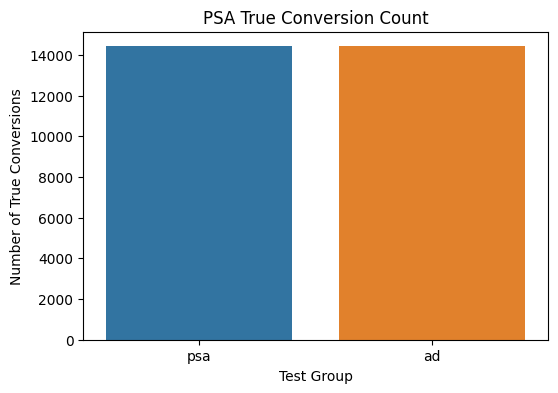

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'data' is your DataFrame
psa_true_count = data[(data['test group'] == 'psa') & (data['converted'] == True)]['converted'].sum()
psa_true_count = data[(data['test group'] == 'ad') & (data['converted'] == True)]['converted'].sum()
# Create a bar chart
plt.figure(figsize=(6, 4))
sns.barplot(x=['psa'], y=[psa_true_count])
sns.barplot(x=['ad'], y=[psa_true_count])
plt.xlabel("Test Group")
plt.ylabel("Number of True Conversions")
plt.title("PSA True Conversion Count")
plt.show()

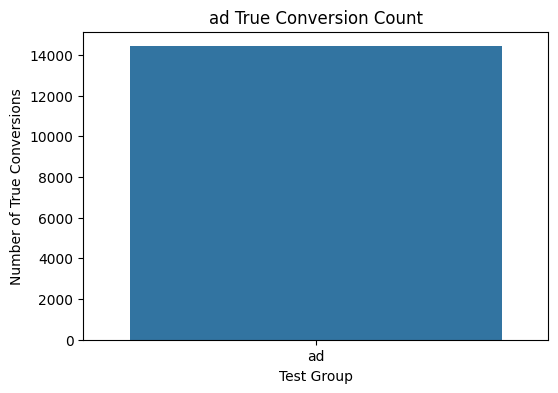

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'data' is your DataFrame
psa_true_count = data[(data['test group'] == 'ad') & (data['converted'] == True)]['converted'].sum()

# Create a bar chart
plt.figure(figsize=(6, 4))
sns.barplot(x=['ad'], y=[psa_true_count])
plt.xlabel("Test Group")
plt.ylabel("Number of True Conversions")
plt.title("ad True Conversion Count")
plt.show()

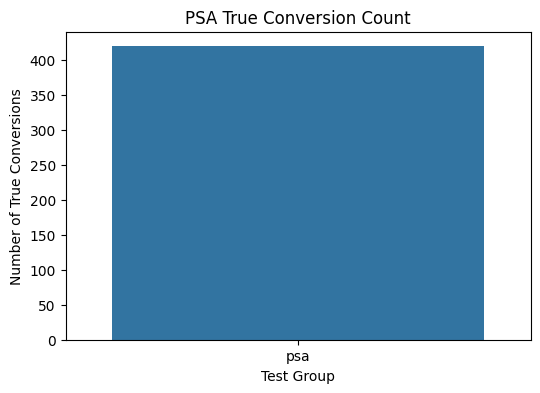

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'data' is your DataFrame
psa_true_count = data[(data['test group'] == 'psa') & (data['converted'] == True)]['converted'].sum()

# Create a bar chart
plt.figure(figsize=(6, 4))
sns.barplot(x=['psa'], y=[psa_true_count])
plt.xlabel("Test Group")
plt.ylabel("Number of True Conversions")
plt.title("PSA True Conversion Count")
plt.show()

In [ ]:
# prompt: i need only few columns to display

import pandas as pd

# Assuming 'data' DataFrame is already loaded as in the previous code

selected_columns = ['user id',	'test group',	'converted']  # Replace with your desired columns
new_data = data[selected_columns]
new_data

,user id,test group,converted
0,1069124,ad,False
1,1119715,ad,False
2,1144181,ad,False
3,1435133,ad,False
4,1015700,ad,False
...,...,...,...
588096,1278437,ad,False
588097,1327975,ad,False
588098,1038442,ad,False
588099,1496395,ad,False


In [ ]:
# Import necessary libraries
import pandas as pd
from scipy.stats import chi2_contingency

# Load the dataset
ab_data = pd.read_csv('/content/marketing-ab-testing/marketing_AB.csv')

# Drop unnecessary columns (if applicable)
ab_data_cleaned = ab_data.drop(columns=['Unnamed: 0'])

# Check the unique test groups
test_groups = ab_data_cleaned['test group'].unique()

# Calculate conversion rates per group
conversion_rates = ab_data_cleaned.groupby('test group')['converted'].mean()
print("Conversion rates:\n", conversion_rates)

# Summarize data for statistical testing
conversion_summary = ab_data_cleaned.groupby('test group')['converted'].agg(['sum', 'count'])
print("\nConversion summary:\n", conversion_summary)

# Create a contingency table
contingency_table = [
    [conversion_summary.loc['ad', 'sum'], conversion_summary.loc['ad', 'count'] - conversion_summary.loc['ad', 'sum']],
    [conversion_summary.loc['psa', 'sum'], conversion_summary.loc['psa', 'count'] - conversion_summary.loc['psa', 'sum']]
]

# Perform the Chi-squared test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Print the results
print("\nChi-squared test results:")
print(f"Chi-squared statistic: {chi2}")
print(f"P-value: {p_value}")

# Interpret the result
alpha = 0.05
if p_value < alpha:
    print("\nResult: The difference in conversion rates between the groups is statistically significant.")
else:
    print("\nResult: The difference in conversion rates between the groups is not statistically significant.")


Conversion rates:
 test group
ad     0.025547
psa    0.017854
Name: converted, dtype: float64

Conversion summary:
               sum   count
test group               
ad          14423  564577
psa           420   23524

Chi-squared test results:
Chi-squared statistic: 54.005823883685245
P-value: 1.9989623063390075e-13

Result: The difference in conversion rates between the groups is statistically significant.


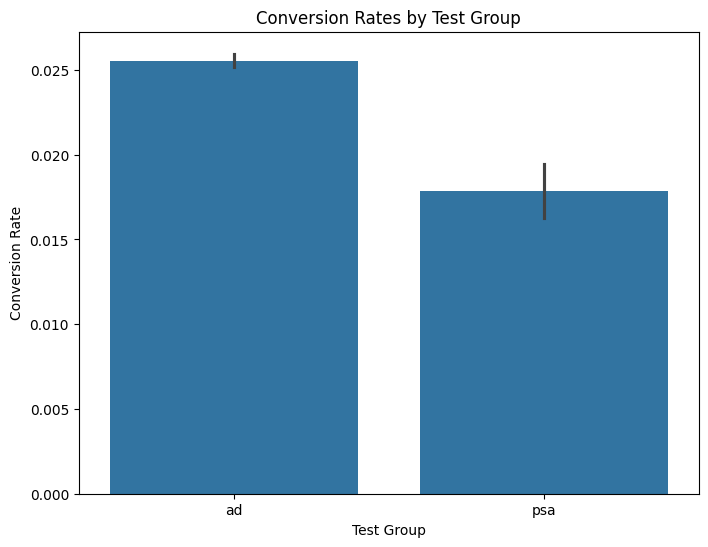

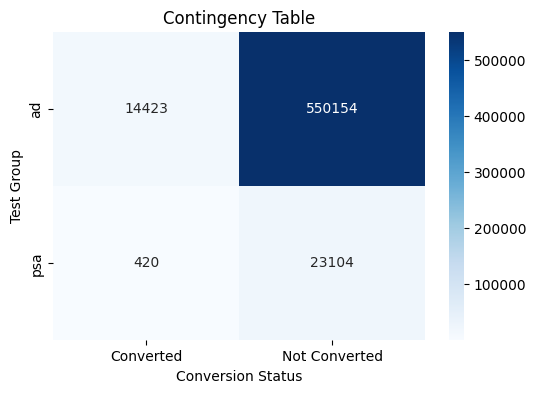

In [ ]:
# prompt: get me visual representation

import matplotlib.pyplot as plt
import seaborn as sns

# ... (Your existing code) ...

# Visualize conversion rates
plt.figure(figsize=(8, 6))
sns.barplot(x='test group', y='converted', data=ab_data_cleaned)
plt.title('Conversion Rates by Test Group')
plt.xlabel('Test Group')
plt.ylabel('Conversion Rate')
plt.show()

# Visualize the contingency table (optional, but helpful)
plt.figure(figsize=(6, 4))
sns.heatmap(np.array(contingency_table), annot=True, fmt='d', cmap='Blues',
            xticklabels=['Converted', 'Not Converted'], yticklabels=['ad', 'psa'])
plt.title('Contingency Table')
plt.xlabel('Conversion Status')
plt.ylabel('Test Group')
plt.show()